# 抓取比特幣(bitcoin)的價量圖

In [1]:
import requests
import pandas as pd

In [2]:
# CoinGecko(幣虎), https://www.coingecko.com/zh-tw
# YouTube: https://www.youtube.com/watch?v=wZ48Gjb-k2U
url = "https://www.coingecko.com/price_charts/1/usd/max.json"
url_headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"}
data = requests.get(url, headers = url_headers)
data

<Response [200]>

In [3]:
# 資料為json格式
prices = data.json()['stats']
volumes = data.json()['total_volumes']

In [4]:
# 價格(後4筆)
prices[-5:-1]

[[1563235200000, 10911.345158309634],
 [1563321600000, 9538.827124243868],
 [1563408000000, 9657.303101319074],
 [1563494400000, 10636.155728360647]]

In [5]:
# 成交量(後4筆)
volumes[-5:-1]

[[1563235200000, 37553147017.32781],
 [1563321600000, 34409824868.73926],
 [1563408000000, 33328381504.616615],
 [1563494400000, 34034952895.23173]]

In [6]:
# 轉成dataframe
df = pd.DataFrame(prices)
dfV = pd.DataFrame(volumes)

In [7]:
# 價格
df.head(5)

,0,1
0,1367107200000,135.30
1,1367193600000,141.96
2,1367280000000,135.30
3,1367366400000,117.00
4,1367452800000,103.43


In [8]:
# 成交量
dfV.head(5)

,0,1
0,1367107200000,0.0
1,1367193600000,0.0
2,1367280000000,0.0
3,1367366400000,0.0
4,1367452800000,0.0


In [9]:
# 檢查筆數有無一致(合併用)
print(len(df), len(dfV))

2273 2273


In [10]:
# 將價格及成交量合併到同一個Dataframe
df['volumes'] = dfV[1]  # 成交量
df.columns = ['datetime','price', 'volume']  # 給column name
df.head(5)

,datetime,price,volume
0,1367107200000,135.30,0.0
1,1367193600000,141.96,0.0
2,1367280000000,135.30,0.0
3,1367366400000,117.00,0.0
4,1367452800000,103.43,0.0


In [11]:
# 將datetime欄位轉成日期格式(1970/01/01 00:00:00算起), 資料取樣為天
pd.to_datetime(df['datetime'], unit='ms').head(10)

0   2013-04-28
1   2013-04-29
2   2013-04-30
3   2013-05-01
4   2013-05-02
5   2013-05-03
6   2013-05-04
7   2013-05-05
8   2013-05-06
9   2013-05-07
Name: datetime, dtype: datetime64[ns]

In [12]:
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
df.head()

,datetime,price,volume
0,2013-04-28,135.30,0.0
1,2013-04-29,141.96,0.0
2,2013-04-30,135.30,0.0
3,2013-05-01,117.00,0.0
4,2013-05-02,103.43,0.0


In [13]:
# 轉成時間序列
df.index = df['datetime']
df.head()

,datetime,price,volume
datetime,,,
2013-04-28,2013-04-28,135.30,0.0
2013-04-29,2013-04-29,141.96,0.0
2013-04-30,2013-04-30,135.30,0.0
2013-05-01,2013-05-01,117.00,0.0
2013-05-02,2013-05-02,103.43,0.0


In [14]:
df.tail(10)

,datetime,price,volume
datetime,,,
2019-07-11 00:00:00.000,2019-07-11 00:00:00.000,12166.398289,4.216363e+10
2019-07-12 00:00:00.000,2019-07-12 00:00:00.000,11385.060491,3.706186e+10
2019-07-13 00:00:00.000,2019-07-13 00:00:00.000,11804.562794,3.007855e+10
2019-07-14 00:00:00.000,2019-07-14 00:00:00.000,11418.511855,2.848505e+10
2019-07-15 00:00:00.000,2019-07-15 00:00:00.000,10285.461109,2.985757e+10
2019-07-16 00:00:00.000,2019-07-16 00:00:00.000,10911.345158,3.755315e+10
2019-07-17 00:00:00.000,2019-07-17 00:00:00.000,9538.827124,3.440982e+10
2019-07-18 00:00:00.000,2019-07-18 00:00:00.000,9657.303101,3.332838e+10
2019-07-19 00:00:00.000,2019-07-19 00:00:00.000,10636.155728,3.403495e+10


In [15]:
type(df['price'])

pandas.core.series.Series

Populating the interactive namespace from numpy and matplotlib


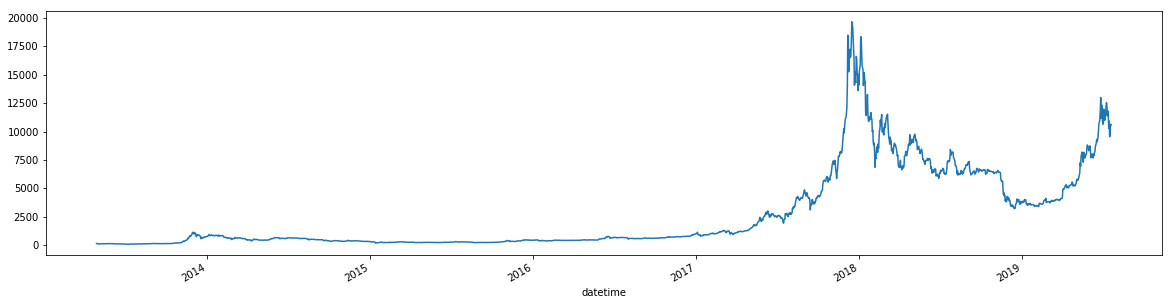

In [16]:
# 畫圖:價格
%pylab inline
df['price'].plot(kind = 'line', figsize=[20, 5])

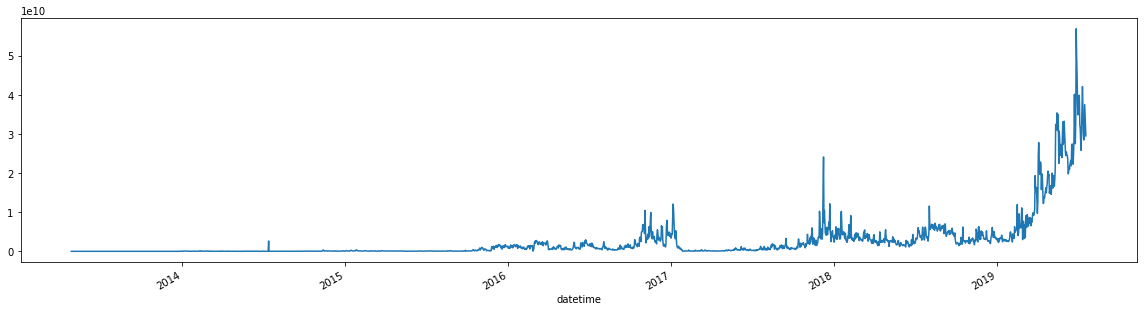

In [17]:
# 畫圖:成交量
df['volume'].plot(kind = 'line', figsize=[20, 5])

## MA技術指標

均線是移動平均線的簡稱，英文稱為(Moving Average, MA)，簡單的說就是過一段時間內的平均值。  
接下來增加一個5日均線及10日均線

In [18]:
df['ma5'] = df['price'].rolling(window = 5).mean()
df['ma10'] = df['price'].rolling(window = 10).mean()
df.head(40)

,datetime,price,volume,ma5,ma10
datetime,,,,,
2013-04-28,2013-04-28,135.300,0.0,NaN,NaN
2013-04-29,2013-04-29,141.960,0.0,NaN,NaN
2013-04-30,2013-04-30,135.300,0.0,NaN,NaN
2013-05-01,2013-05-01,117.000,0.0,NaN,NaN
2013-05-02,2013-05-02,103.430,0.0,126.5980,NaN
2013-05-03,2013-05-03,91.010,0.0,117.7400,NaN
2013-05-04,2013-05-04,111.250,0.0,111.5980,NaN
2013-05-05,2013-05-05,116.790,0.0,107.8960,NaN
2013-05-06,2013-05-06,118.330,0.0,108.1620,NaN


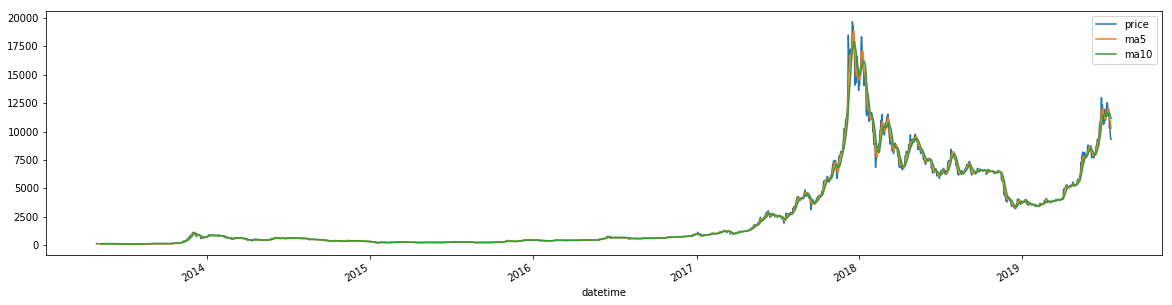

In [19]:
df[['price','ma5','ma10']].plot(kind = 'line', figsize=[20, 5])

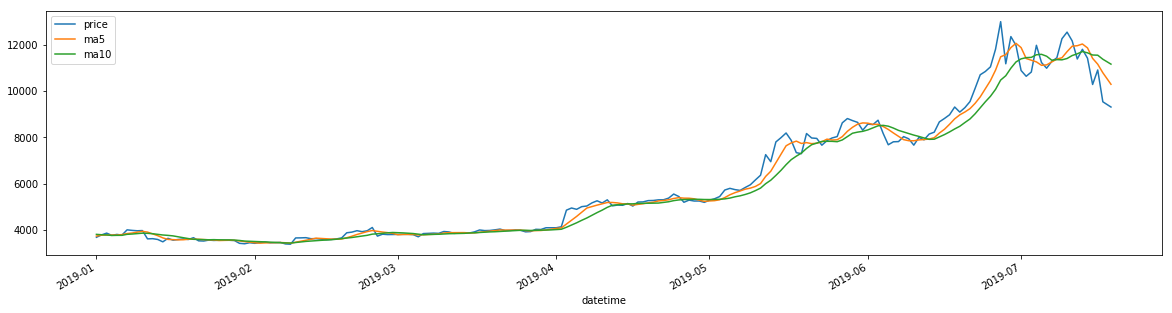

In [20]:
# show 2019
df2 = df[df['datetime'] >= '2019-01-01']
df2[['price','ma5','ma10']].plot(kind = 'line', figsize=[20, 5])

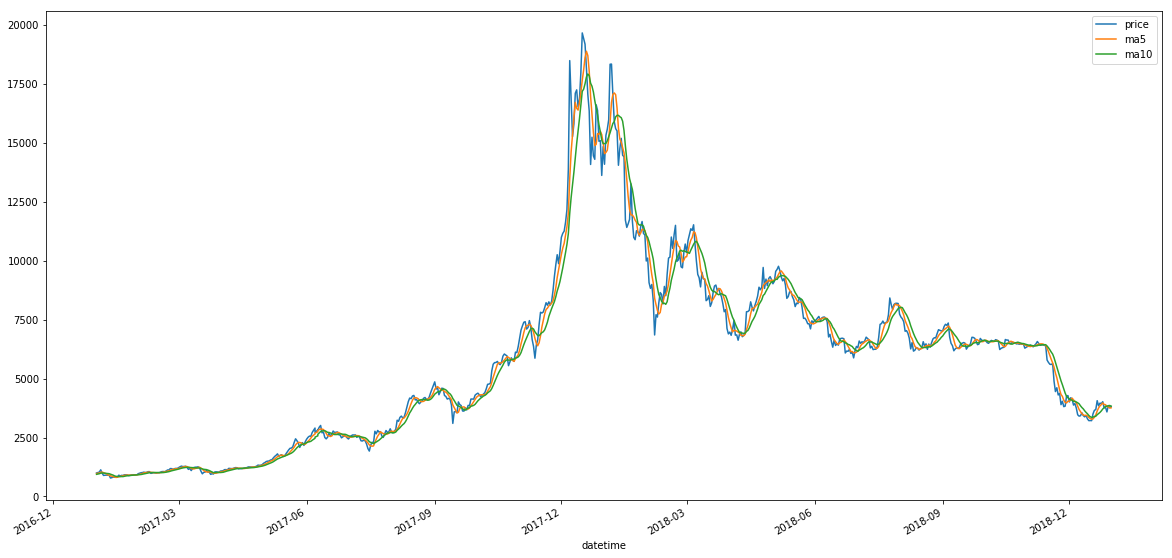

In [21]:
# show 2017~2018
df3 = df['2017-01-01':'2018-12-31']
df3[['price','ma5','ma10']].plot(kind = 'line', figsize=[20, 10])

## 布林通道
參考網址:https://www.cmoney.tw/notes/note-detail.aspx?nid=17738

布林通道 是結合 均線 和 標準差 的概念
以 20MA 為中心 上下各2個標準差 為範圍的軌道操作方式
布林通道 又稱 布林格帶狀(Bollinger Bands，BBands) 或 保力加通道，

是由 約翰．布林格(John Bollinger) 所提出的概念。

 

 

原始設定為:

帶狀上限 = 帶狀中心線 + 2個標準差

帶狀中心線 = 20期移動平均線(即20MA)

帶狀下限 = 帶狀中心線 - 2個標準差

 

布林格 結合了 移動平均線 和 統計學標準差 的概念。

其中基本的型態，就是由 3條軌道線組成的帶狀通道。

中軌 = 平均成本

上軌 = 股價的壓力線

下軌 = 股價的支撐線

In [22]:
df['ma20'] = df['price'].rolling(window = 20).mean()
df['std20'] = df['price'].rolling(window = 20).std()
df['BB+'] = df['ma20'] + df['price'].rolling(window = 20).std()*2
df['BB-'] = df['ma20'] - df['price'].rolling(window = 20).std()*2
df.head(30)

,datetime,price,volume,ma5,ma10,ma20,std20,BB+,BB-
datetime,,,,,,,,,
2013-04-28,2013-04-28,135.300,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,2013-04-29,141.960,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,2013-04-30,135.300,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,2013-05-01,117.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,2013-05-02,103.430,0.0,126.5980,NaN,NaN,NaN,NaN,NaN
2013-05-03,2013-05-03,91.010,0.0,117.7400,NaN,NaN,NaN,NaN,NaN
2013-05-04,2013-05-04,111.250,0.0,111.5980,NaN,NaN,NaN,NaN,NaN
2013-05-05,2013-05-05,116.790,0.0,107.8960,NaN,NaN,NaN,NaN,NaN
2013-05-06,2013-05-06,118.330,0.0,108.1620,NaN,NaN,NaN,NaN,NaN


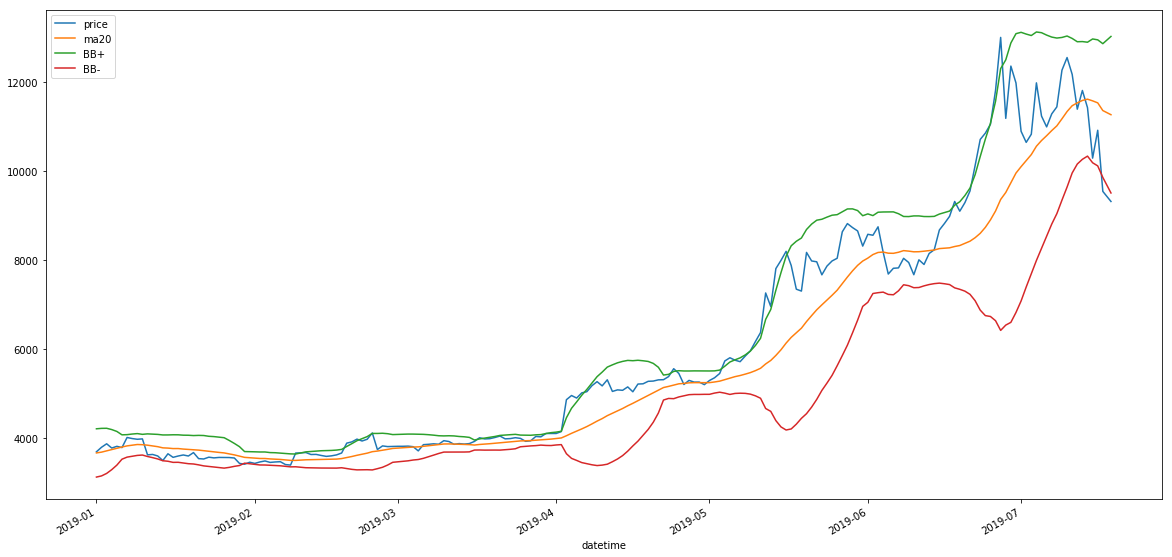

In [23]:
df4 = df[df['datetime'] >= '2019-01-01']
df4[['price','ma20','BB+', 'BB-']].plot(kind = 'line', figsize=[20, 10])

# 黃金交叉賺黃金：

## 「短期均線」向上突破「長期均線」
黃金交叉後，股價走「多頭」的機率高
以短線操作來說，當 5 日均線向上突破 20 日均線，也就是短期的平均買進成本大於長期平均成本
代表短期買方的力道較大，市場上大多數人獲利
市場易走出「多頭」的趨勢，進而帶動長期均線向上，
讓股價上漲機率較大。

# 死亡交叉下地獄：

## 「短期均線」向下跌破「長期均線」
死亡交叉後，股價走「空頭」機會大
以短線操作來說，當 5 日均線向下跌破 20 日均線，也就是短期的平均買進成本小於長期平均成本
表示短線上投資人都賠錢人，賣方的力道較大
市場容易走出「空頭」的趨勢，進而帶動長期均線向下
股價後續較容易出現弱勢下跌的走勢。

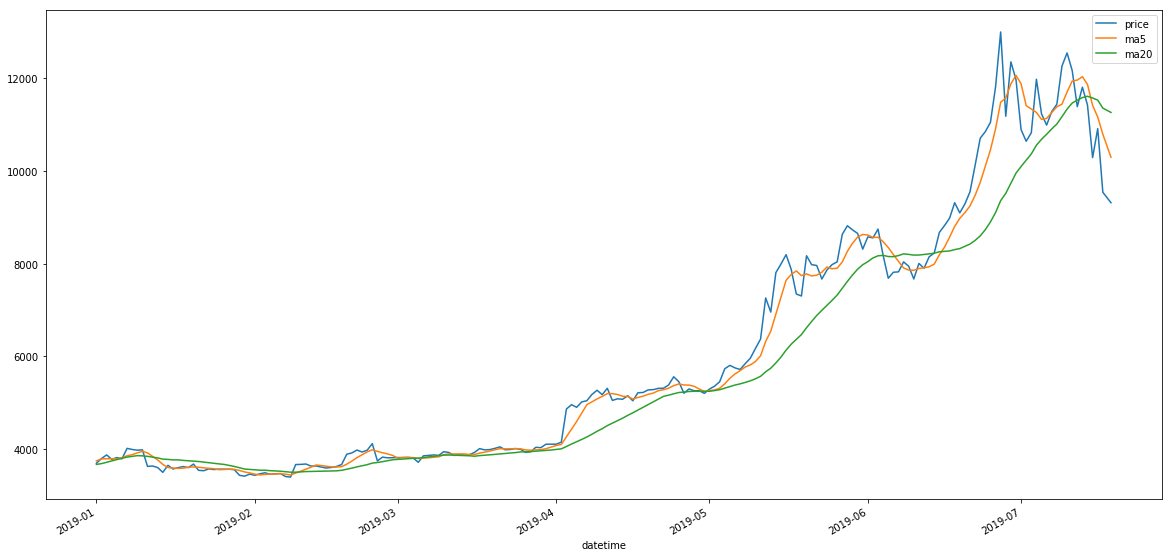

In [24]:
df5 = df[df['datetime'] >= '2019-01-01']
df5[['price','ma5','ma20']].plot(kind = 'line', figsize=[20, 10])